In [1]:
import py_vollib 
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes.greeks.analytical import delta 
from py_vollib.black_scholes.greeks.analytical import gamma
from py_vollib.black_scholes.greeks.analytical import rho
from py_vollib.black_scholes.greeks.analytical import theta
from py_vollib.black_scholes.greeks.analytical import vega

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Load traded options transaction data on DTCC for February 2021

In [3]:
df = pd.read_excel('database.xlsx', index_col='Execution Timestamp')
df

,Report Date,TR,Primary Asset Class,Product ID,Action,Transaction Type,Cleared,Effective Date,Exchange Rate,Exchange Rate Basis,...,Notional Amount 2,Notional Currency 1,Notional Currency 2,Option Premium Amount,Option Premium Currency,Strike Price,Option Type,Option Style,Execution Venue Type,Term (months)
Execution Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7800,USD/AUD,...,"39,000,000",AUD,USD,"1,435,500",AUD,0.7800,C-,EU,OFF,11
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.8500,USD/AUD,...,"43,000,000",AUD,USD,"299,988.23652",AUD,0.8500,C-,EU,OFF,11
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7700,USD/AUD,...,"8,000,000",AUD,USD,"29,298.70133",AUD,0.7700,C-,EU,OFF,0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7800,USD/AUD,...,"8,000,000",AUD,USD,"5,333.33336",AUD,0.7800,C-,EU,OFF,0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7525,USD/AUD,...,"19,000,000",AUD,USD,"155,534.88412",AUD,0.7525,P-,EU,OFF,1
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7630,USD/AUD,...,"8,000,000",AUD,USD,"94,888.5975",USD,0.7630,P-,EU,OFF,1
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7630,USD/AUD,...,"8,000,000",AUD,USD,"90,694.62634",USD,0.7630,C-,EU,OFF,1
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7608,USD/AUD,...,"150,000",AUD,USD,"1,059",USD,0.7608,P-,EU,OFF,0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7500,USD/AUD,...,"380,000",AUD,USD,"3,215.91466",USD,0.7500,P-,EU,OFF,1


### Load USD/AUD spot rates data from Yahoo Finance for February 2021

In [4]:
df2 = pd.read_csv('AUDUSD=X.csv', index_col='Date')
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,0.762062,0.766401,0.761350,0.761998,0.761998,0
2021-02-02,0.763330,0.766190,0.756670,0.763460,0.763460,0
2021-02-03,0.760900,0.762700,0.760240,0.760821,0.760821,0
2021-02-04,0.763633,0.764750,0.759000,0.763600,0.763600,0
2021-02-05,0.760092,0.766000,0.758440,0.760300,0.760300,0
2021-02-08,0.767890,0.771516,0.765257,0.767920,0.767920,0
2021-02-09,0.770558,0.773646,0.770470,0.771100,0.771100,0
2021-02-10,0.774100,0.775450,0.771992,0.774050,0.774050,0
2021-02-11,0.772469,0.777300,0.771320,0.772535,0.772535,0


### Inner join two datasets on Date

In [5]:
df3 = df.join(df2)
df3

,Report Date,TR,Primary Asset Class,Product ID,Action,Transaction Type,Cleared,Effective Date,Exchange Rate,Exchange Rate Basis,...,Option Type,Option Style,Execution Venue Type,Term (months),Open,High,Low,Close,Adj Close,Volume
2021-01-25,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-01-25,0.7707,USD/AUD,...,P-,EU,OFF,1,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,2021-02-19,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-01-25,0.7350,USD/AUD,...,P-,EU,OFF,1,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,2021-02-19,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-01-25,0.7350,USD/AUD,...,P-,EU,OFF,1,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,2021-02-25,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-01-25,0.7500,USD/AUD,...,P-,EU,OFF,1,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7800,USD/AUD,...,C-,EU,OFF,11,0.762062,0.766401,0.761350,0.761998,0.761998,0.0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.8500,USD/AUD,...,C-,EU,OFF,11,0.762062,0.766401,0.761350,0.761998,0.761998,0.0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7700,USD/AUD,...,C-,EU,OFF,0,0.762062,0.766401,0.761350,0.761998,0.761998,0.0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7800,USD/AUD,...,C-,EU,OFF,0,0.762062,0.766401,0.761350,0.761998,0.761998,0.0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7525,USD/AUD,...,P-,EU,OFF,1,0.762062,0.766401,0.761350,0.761998,0.761998,0.0
2021-02-01,2021-02-01,DTCC,FX,ForeignExchange:VanillaOption,NEW,Trade,U,2021-02-01,0.7630,USD/AUD,...,P-,EU,OFF,1,0.762062,0.766401,0.761350,0.761998,0.761998,0.0


### Clean data

In [6]:
# fix format for option type
df3['Option Type'] = df3['Option Type'].apply(lambda x: x[0].lower())

In [7]:
# convert string type to float type
df3['Option Premium Amount'] = df3['Option Premium Amount'].str.replace(',','').astype(float)

In [8]:
# convert string type to float type
df3['Notional Amount 1'] = df3['Notional Amount 1'].str.replace(',','').astype(float)

In [9]:
# convert string type to float type
df3['Notional Amount 2'] = df3['Notional Amount 2'].str.replace(',','').astype(float)

In [10]:
df3.columns

Index(['Report Date', 'TR', 'Primary Asset Class', 'Product ID', 'Action',
       'Transaction Type', 'Cleared', 'Effective Date', 'Exchange Rate',
       'Exchange Rate Basis', 'Expiration Date', 'Leg 2 - Floating Rate Index',
       'Notional Amount 1', 'Notional Amount 2', 'Notional Currency 1',
       'Notional Currency 2', 'Option Premium Amount',
       'Option Premium Currency', 'Strike Price', 'Option Type',
       'Option Style', 'Execution Venue Type', 'Term (months)', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [11]:
# drop the few rows where notional amounts 1 and 2 are swapped (potential data quality issue)
df3 = df3[(df3['Notional Amount 2'] / df3['Notional Amount 1']) < 1]

### Convert to a common currency (USD)

In [18]:
df4 = df3[['Option Premium Amount','Notional Amount 1','Notional Amount 2','Option Premium Currency','Adj Close','Exchange Rate','Expiration Date','Option Type','Option Style']]
df4.reset_index(inplace=True)
df4

,index,Option Premium Amount,Notional Amount 1,Notional Amount 2,Option Premium Currency,Adj Close,Exchange Rate,Expiration Date,Option Type,Option Style
0,2021-01-25,7.600000e+02,259504.0,200000.0,USD,NaN,0.7707,2021-02-01,p,EU
1,2021-01-25,3.093333e+04,39455782.0,29000000.0,USD,NaN,0.7350,2021-02-19,p,EU
2,2021-01-25,3.219592e+04,39455782.0,29000000.0,USD,NaN,0.7350,2021-02-19,p,EU
3,2021-01-25,2.849992e+02,133333.0,100000.0,USD,NaN,0.7500,2021-02-25,p,EU
4,2021-02-01,1.435500e+06,50000000.0,39000000.0,AUD,0.761998,0.7800,2022-01-04,c,EU
5,2021-02-01,2.999882e+05,50588236.0,43000000.0,AUD,0.761998,0.8500,2022-01-04,c,EU
6,2021-02-01,2.929870e+04,10389610.0,8000000.0,AUD,0.761998,0.7700,2021-02-08,c,EU
7,2021-02-01,5.333333e+03,10256410.0,8000000.0,AUD,0.761998,0.7800,2021-02-08,c,EU
8,2021-02-01,1.555349e+05,25249170.0,19000000.0,AUD,0.761998,0.7525,2021-03-01,p,EU
9,2021-02-01,9.488860e+04,10484928.0,8000000.0,USD,0.761998,0.7630,2021-03-01,p,EU


In [19]:
# check that notional amounts are consistent with strike exchange rate USD/AUD
df4['Notional Amount 2'] / df4['Notional Amount 1']

0      0.770701
1      0.735000
2      0.735000
3      0.750002
4      0.780000
5      0.850000
6      0.770000
7      0.780000
8      0.752500
9      0.763000
10     0.763000
11     0.760800
12     0.750000
13     0.753000
14     0.758000
15     0.778000
16     0.730000
17     0.736000
18     0.747500
19     0.755000
20     0.710000
21     0.760000
22     0.759100
23     0.700000
24     0.720000
25     0.747500
26     0.754000
27     0.780000
28     0.710000
29     0.741000
         ...   
806    0.810000
807    0.780700
808    0.800000
809    0.778000
810    0.778101
811    0.803000
812    0.792500
813    0.784000
814    0.765000
815    0.805001
816    0.795000
817    0.788000
818    0.779991
819    0.774000
820    0.785000
821    0.779000
822    0.777992
823    0.787000
824    0.787000
825    0.796000
826    0.761700
827    0.780000
828    0.786000
829    0.786000
830    0.785000
831    0.777500
832    0.862500
833    0.771500
834    0.771500
835    0.776000
Length: 836, dtype: floa

In [20]:
# convert to USD common currency option premiums
df4.loc[df4['Option Premium Currency'] == 'AUD', 'Option Premium Amount'] = df4.loc[df4['Option Premium Currency'] == 'AUD', 'Option Premium Amount'] / df4.loc[df4['Option Premium Currency'] == 'AUD', 'Exchange Rate']
df4.drop(['Notional Amount 1','Option Premium Currency','Option Style'], axis=1, inplace=True)
df4

C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Option Premium Amount,Notional Amount 2,Adj Close,Exchange Rate,Expiration Date,Option Type
0,2021-01-25,7.600000e+02,200000.0,NaN,0.7707,2021-02-01,p
1,2021-01-25,3.093333e+04,29000000.0,NaN,0.7350,2021-02-19,p
2,2021-01-25,3.219592e+04,29000000.0,NaN,0.7350,2021-02-19,p
3,2021-01-25,2.849992e+02,100000.0,NaN,0.7500,2021-02-25,p
4,2021-02-01,1.840385e+06,39000000.0,0.761998,0.7800,2022-01-04,c
5,2021-02-01,3.529273e+05,43000000.0,0.761998,0.8500,2022-01-04,c
6,2021-02-01,3.805026e+04,8000000.0,0.761998,0.7700,2021-02-08,c
7,2021-02-01,6.837607e+03,8000000.0,0.761998,0.7800,2021-02-08,c
8,2021-02-01,2.066909e+05,19000000.0,0.761998,0.7525,2021-03-01,p
9,2021-02-01,9.488860e+04,8000000.0,0.761998,0.7630,2021-03-01,p


### IV example

In [22]:
df4['Adj_Prem'] = df4['Option Premium Amount'] / df4['Notional Amount 2']
df4['Maturity'] = (df4['Expiration Date'] - df4['index']).dt.days / 365 # time to maturity as of execution date
df4.drop(['Option Premium Amount','Expiration Date'], axis=1, inplace=True)
df4.columns = ['Date','USD_notional','Spot_USDAUD','Strike_USDAUD','Type','Adj_Prem','Maturity']
df4 = df4[~(df4['Maturity'] <= 0)]
df4.dropna(inplace=True)
df4

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity
4,2021-02-01,39000000.0,0.761998,0.7800,c,0.047189,0.923288
5,2021-02-01,43000000.0,0.761998,0.8500,c,0.008208,0.923288
6,2021-02-01,8000000.0,0.761998,0.7700,c,0.004756,0.019178
7,2021-02-01,8000000.0,0.761998,0.7800,c,0.000855,0.019178
8,2021-02-01,19000000.0,0.761998,0.7525,p,0.010878,0.076712
9,2021-02-01,8000000.0,0.761998,0.7630,p,0.011861,0.076712
10,2021-02-01,8000000.0,0.761998,0.7630,c,0.011337,0.076712
11,2021-02-01,150000.0,0.761998,0.7608,p,0.007060,0.057534
12,2021-02-01,380000.0,0.761998,0.7500,p,0.008463,0.142466
13,2021-02-01,1000000.0,0.761998,0.7530,p,0.005850,0.076712


In [24]:
iv(df4['Adj_Prem'][4], df4['Spot_USDAUD'][4], df4['Strike_USDAUD'][4], df4['Maturity'][4], 0.0001 - 0.0008, df4['Type'][4])

0.18953700714783667

### Calculate IV

In [25]:
error_lst = []
for i in tqdm(df4.index):
    try:
        df4.loc[i,'IV'] = iv(df4['Adj_Prem'][i], df4['Spot_USDAUD'][i], df4['Strike_USDAUD'][i], 
                 df4['Maturity'][i], 0.0001 - 0.0008, df4['Type'][i])
    except:
        error_lst.append(i)
df4.drop(error_lst, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████| 832/832 [00:00<00:00, 1569.52it/s]


In [26]:
# drop where IV = 0 or infinity
df4['IV'].replace(np.inf, np.nan, inplace=True)
df4['IV'].replace(0, np.nan, inplace=True)
df5 = df4.dropna()
df5

,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity,IV
4,2021-02-01,39000000.0,0.761998,0.7800,c,0.047189,0.923288,0.189537
5,2021-02-01,43000000.0,0.761998,0.8500,c,0.008208,0.923288,0.118830
6,2021-02-01,8000000.0,0.761998,0.7700,c,0.004756,0.019178,0.192424
7,2021-02-01,8000000.0,0.761998,0.7800,c,0.000855,0.019178,0.141197
8,2021-02-01,19000000.0,0.761998,0.7525,p,0.010878,0.076712,0.180955
9,2021-02-01,8000000.0,0.761998,0.7630,p,0.011861,0.076712,0.134504
10,2021-02-01,8000000.0,0.761998,0.7630,c,0.011337,0.076712,0.140666
11,2021-02-01,150000.0,0.761998,0.7608,p,0.007060,0.057534,0.104716
12,2021-02-01,380000.0,0.761998,0.7500,p,0.008463,0.142466,0.119485
13,2021-02-01,1000000.0,0.761998,0.7530,p,0.005850,0.076712,0.115610


### Calculate Greeks

In [27]:
error_lst2 = []
for i in tqdm(df5.index):
    try:
        df5.loc[i,'Delta'] = delta(df5['Type'][i],df5['Spot_USDAUD'][i],df5['Strike_USDAUD'][i],df5['Maturity'][i],0.0001 - 0.0008,df5['IV'][i])
        df5.loc[i,'Gamma'] = gamma(df5['Type'][i],df5['Spot_USDAUD'][i],df5['Strike_USDAUD'][i],df5['Maturity'][i],0.0001 - 0.0008,df5['IV'][i])
        df5.loc[i,'Rho'] = rho(df5['Type'][i],df5['Spot_USDAUD'][i],df5['Strike_USDAUD'][i],df5['Maturity'][i],0.0001 - 0.0008,df5['IV'][i])
        df5.loc[i,'Theta'] = theta(df5['Type'][i],df5['Spot_USDAUD'][i],df5['Strike_USDAUD'][i],df5['Maturity'][i],0.0001 - 0.0008,df5['IV'][i])
        df5.loc[i,'Vega'] = vega(df5['Type'][i],df5['Spot_USDAUD'][i],df5['Strike_USDAUD'][i],df5['Maturity'][i],0.0001 - 0.0008,df5['IV'][i])
    except:
        error_lst2.append(i)
df5.drop(error_lst2, inplace=True)

  0%|                                                                                          | 0/807 [00:00<?, ?it/s]C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
100%|████████████████████████████████████████████████████████████████████████████████| 807/807 [03:27<00:00,  3.88it/s]
C:\Users\Ja

### Volatility smile example

In [28]:
# use the option chain (with a specific time to maturity = 0.038356) with the most data to plot a volatility smile
df5.groupby('Maturity').count()['Date'].sort_values(ascending=False)

Maturity
0.038356    142
0.019178    107
0.076712     75
0.057534     52
0.027397     16
0.090411     15
0.021918     15
0.035616     15
0.095890     13
0.041096     13
0.002740     13
0.030137     12
0.238356     12
0.221918     12
0.249315     11
0.024658     10
0.010959     10
0.008219      9
0.060274      9
0.013699      8
0.093151      7
0.191781      7
0.046575      7
0.235616      7
0.073973      6
0.169863      6
0.167123      6
0.049315      6
0.043836      6
0.005479      6
           ... 
4.008219      2
0.923288      2
0.989041      2
0.172603      2
1.000000      2
0.145205      2
0.830137      1
0.852055      1
0.758904      1
1.005479      1
0.139726      1
0.345205      1
0.424658      1
0.367123      1
0.120548      1
0.117808      1
0.112329      1
0.109589      1
0.183562      1
0.205479      1
0.213699      1
0.227397      1
0.230137      1
0.260274      1
0.265753      1
0.306849      1
0.328767      1
0.126027      1
0.358904      1
0.178082      1
Name: Date, Len

In [29]:
# use the option chain (with a specific execution date = 2021-02-17) with the most data to plot a volatility smile
df5.loc[(df5['Maturity'] > 0.038355) & (df5['Maturity'] < 0.038357)].groupby('Date').count()['Maturity'].sort_values(ascending=False)

Date
2021-02-17    19
2021-02-18    14
2021-02-19    13
2021-02-16    13
2021-02-03    12
2021-02-04    12
2021-02-08    11
2021-02-22     9
2021-02-05     6
2021-02-10     6
2021-02-24     5
2021-02-26     4
2021-02-02     4
2021-02-23     3
2021-02-09     3
2021-02-12     2
2021-02-11     2
2021-02-25     2
2021-02-15     1
2021-02-01     1
Name: Maturity, dtype: int64

In [31]:
df5.loc[(df5['Maturity'] > 0.038355) & (df5['Maturity'] < 0.038357) & (df5['Date'] == '2021-02-17')].sort_values('Strike_USDAUD')

,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity,IV,Delta,Gamma,Rho,Theta,Vega
418,2021-02-17,200000.0,0.77379,0.7633,p,0.002390,0.038356,0.104686,-0.249937,20.027939,-0.000075,-0.000180,0.000482
420,2021-02-17,200000.0,0.77379,0.7636,p,0.002510,0.038356,0.105548,-0.257738,20.187424,-0.000077,-0.000185,0.000489
421,2021-02-17,250000.0,0.77379,0.7638,p,0.002590,0.038356,0.106089,-0.262870,20.289616,-0.000079,-0.000188,0.000494
446,2021-02-17,230000.0,0.77379,0.7640,p,0.002940,0.038356,0.111964,-0.277460,19.751434,-0.000083,-0.000204,0.000508
419,2021-02-17,330000.0,0.77379,0.7641,p,0.002710,0.038356,0.106850,-0.270473,20.437495,-0.000081,-0.000192,0.000502
450,2021-02-17,650000.0,0.77379,0.7650,p,0.003210,0.038356,0.111486,-0.297039,20.486898,-0.000089,-0.000209,0.000525
443,2021-02-17,2000000.0,0.77379,0.7660,p,0.004857,0.038356,0.135661,-0.347119,17.962126,-0.000105,-0.000272,0.000560
462,2021-02-17,2000000.0,0.77379,0.7660,p,0.005743,0.038356,0.151379,-0.361216,16.326957,-0.000109,-0.000307,0.000568
451,2021-02-17,2000000.0,0.77379,0.7665,p,0.006042,0.038356,0.153312,-0.370936,16.264335,-0.000112,-0.000314,0.000573
440,2021-02-17,770000.0,0.77379,0.7680,p,0.006714,0.038356,0.154669,-0.396580,16.445090,-0.000120,-0.000323,0.000584


In [33]:
# Python float point comparison issues, cannot set Maturity = 0.038356
dfplot = df5.loc[(df5['Maturity'] > 0.038355) & (df5['Maturity'] < 0.038357) & (df5['Date'] == '2021-02-17'), ['Strike_USDAUD','IV']]
dfplot

,Strike_USDAUD,IV
418,0.7633,0.104686
419,0.7641,0.106850
420,0.7636,0.105548
421,0.7638,0.106089
427,0.7750,0.134046
429,0.7760,0.129245
434,0.7700,0.167274
440,0.7680,0.154669
443,0.7660,0.135661
446,0.7640,0.111964


In [34]:
dfplot.sort_values('Strike_USDAUD', inplace=True)

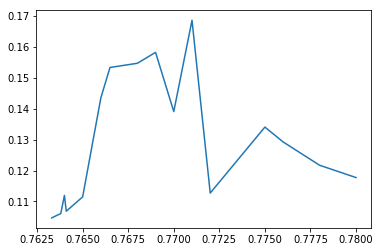

In [35]:
plt.plot(dfplot.groupby('Strike_USDAUD')['IV'].mean())

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


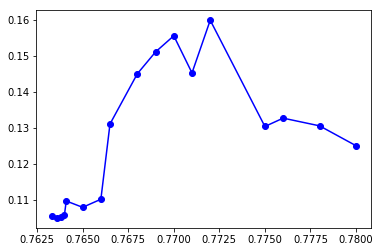

In [36]:
# Simple Exponential Smoothing
smooth = SimpleExpSmoothing(dfplot.groupby('Strike_USDAUD')['IV'].mean()).fit()
plt.plot(smooth.fittedvalues, marker='o', color='blue')

### Randomly assign NAB options

In [37]:
df5['NAB'] = np.random.rand(len(df5))
df5['NAB'] = (df5['NAB'] > 0.9).astype(int)
df5

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity,IV,Delta,Gamma,Rho,Theta,Vega,NAB
4,2021-02-01,39000000.0,0.761998,0.7800,c,0.047189,0.923288,0.189537,0.483768,2.872328,0.002968,-0.000081,0.002919,0
5,2021-02-01,43000000.0,0.761998,0.8500,c,0.008208,0.923288,0.118830,0.182533,3.042399,0.001208,-0.000034,0.001938,0
6,2021-02-01,8000000.0,0.761998,0.7700,c,0.004756,0.019178,0.192424,0.352268,18.283968,0.000051,-0.000538,0.000392,0
7,2021-02-01,8000000.0,0.761998,0.7800,c,0.000855,0.019178,0.141197,0.117996,13.267028,0.000017,-0.000210,0.000209,0
8,2021-02-01,19000000.0,0.761998,0.7525,p,0.010878,0.076712,0.180955,-0.391946,10.060527,-0.000237,-0.000263,0.000811,0
9,2021-02-01,8000000.0,0.761998,0.7630,p,0.011861,0.076712,0.134504,-0.507216,14.051295,-0.000306,-0.000203,0.000842,0
10,2021-02-01,8000000.0,0.761998,0.7630,c,0.011337,0.076712,0.140666,0.493766,13.436349,0.000280,-0.000211,0.000842,0
11,2021-02-01,150000.0,0.761998,0.7608,p,0.007060,0.057534,0.104716,-0.470665,20.787643,-0.000210,-0.000182,0.000727,0
12,2021-02-01,380000.0,0.761998,0.7500,p,0.008463,0.142466,0.119485,-0.354855,10.831743,-0.000397,-0.000124,0.001071,0
13,2021-02-01,1000000.0,0.761998,0.7530,p,0.005850,0.076712,0.115610,-0.350006,15.180609,-0.000209,-0.000162,0.000782,0


In [38]:
df5['long'] = np.random.choice([-1, 1], len(df5), p = [0.6, 0.4])
df5

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity,IV,Delta,Gamma,Rho,Theta,Vega,NAB,long
4,2021-02-01,39000000.0,0.761998,0.7800,c,0.047189,0.923288,0.189537,0.483768,2.872328,0.002968,-0.000081,0.002919,0,-1
5,2021-02-01,43000000.0,0.761998,0.8500,c,0.008208,0.923288,0.118830,0.182533,3.042399,0.001208,-0.000034,0.001938,0,-1
6,2021-02-01,8000000.0,0.761998,0.7700,c,0.004756,0.019178,0.192424,0.352268,18.283968,0.000051,-0.000538,0.000392,0,1
7,2021-02-01,8000000.0,0.761998,0.7800,c,0.000855,0.019178,0.141197,0.117996,13.267028,0.000017,-0.000210,0.000209,0,-1
8,2021-02-01,19000000.0,0.761998,0.7525,p,0.010878,0.076712,0.180955,-0.391946,10.060527,-0.000237,-0.000263,0.000811,0,-1
9,2021-02-01,8000000.0,0.761998,0.7630,p,0.011861,0.076712,0.134504,-0.507216,14.051295,-0.000306,-0.000203,0.000842,0,-1
10,2021-02-01,8000000.0,0.761998,0.7630,c,0.011337,0.076712,0.140666,0.493766,13.436349,0.000280,-0.000211,0.000842,0,-1
11,2021-02-01,150000.0,0.761998,0.7608,p,0.007060,0.057534,0.104716,-0.470665,20.787643,-0.000210,-0.000182,0.000727,0,1
12,2021-02-01,380000.0,0.761998,0.7500,p,0.008463,0.142466,0.119485,-0.354855,10.831743,-0.000397,-0.000124,0.001071,0,-1
13,2021-02-01,1000000.0,0.761998,0.7530,p,0.005850,0.076712,0.115610,-0.350006,15.180609,-0.000209,-0.000162,0.000782,0,1


In [39]:
df5.dropna(inplace=True)
df5

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,USD_notional,Spot_USDAUD,Strike_USDAUD,Type,Adj_Prem,Maturity,IV,Delta,Gamma,Rho,Theta,Vega,NAB,long
4,2021-02-01,39000000.0,0.761998,0.7800,c,0.047189,0.923288,0.189537,0.483768,2.872328,0.002968,-0.000081,0.002919,0,-1
5,2021-02-01,43000000.0,0.761998,0.8500,c,0.008208,0.923288,0.118830,0.182533,3.042399,0.001208,-0.000034,0.001938,0,-1
6,2021-02-01,8000000.0,0.761998,0.7700,c,0.004756,0.019178,0.192424,0.352268,18.283968,0.000051,-0.000538,0.000392,0,1
7,2021-02-01,8000000.0,0.761998,0.7800,c,0.000855,0.019178,0.141197,0.117996,13.267028,0.000017,-0.000210,0.000209,0,-1
8,2021-02-01,19000000.0,0.761998,0.7525,p,0.010878,0.076712,0.180955,-0.391946,10.060527,-0.000237,-0.000263,0.000811,0,-1
9,2021-02-01,8000000.0,0.761998,0.7630,p,0.011861,0.076712,0.134504,-0.507216,14.051295,-0.000306,-0.000203,0.000842,0,-1
10,2021-02-01,8000000.0,0.761998,0.7630,c,0.011337,0.076712,0.140666,0.493766,13.436349,0.000280,-0.000211,0.000842,0,-1
11,2021-02-01,150000.0,0.761998,0.7608,p,0.007060,0.057534,0.104716,-0.470665,20.787643,-0.000210,-0.000182,0.000727,0,1
12,2021-02-01,380000.0,0.761998,0.7500,p,0.008463,0.142466,0.119485,-0.354855,10.831743,-0.000397,-0.000124,0.001071,0,-1
13,2021-02-01,1000000.0,0.761998,0.7530,p,0.005850,0.076712,0.115610,-0.350006,15.180609,-0.000209,-0.000162,0.000782,0,1


### NAB Greeks

In [52]:
# divide by 100,000 (AUD contract size) * current spot exchange rate (USD) to get USD Greeks
today = df5['Date'].max()
spot = df5.loc[df5['Date'] == today, 'Spot_USDAUD'].mean()

In [54]:
# Delta per 100,000 AUD
(df5[df5['NAB'] == 1]['Delta'] * df5[df5['NAB'] == 1]['USD_notional'] * df5[df5['NAB'] == 1]['long']).sum() / (100000 * spot)

-452.22138370371

In [55]:
# Gamma per 100,000 AUD
(df5[df5['NAB'] == 1]['Gamma'] * df5[df5['NAB'] == 1]['USD_notional'] * df5[df5['NAB'] == 1]['long']).sum() / (100000 * spot)

-118242.44328824026

In [56]:
# Rho per 100,000 AUD
(df5[df5['NAB'] == 1]['Rho'] * df5[df5['NAB'] == 1]['USD_notional'] * df5[df5['NAB'] == 1]['long']).sum() / (100000 * spot)

-0.3047666278659851

In [57]:
# Theta per 100,000 AUD
(df5[df5['NAB'] == 1]['Theta'] * df5[df5['NAB'] == 1]['USD_notional'] * df5[df5['NAB'] == 1]['long']).sum() / (100000 * spot)

2.771140356906027

In [58]:
# Vega per 100,000 AUD
(df5[df5['NAB'] == 1]['Vega'] * df5[df5['NAB'] == 1]['USD_notional'] * df5[df5['NAB'] == 1]['long']).sum() / (100000 * spot)

0.7238383184636346